In [18]:
import string
import warnings

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import spacy
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize

warnings.filterwarnings("ignore")
sns.set_theme()

In [2]:
# data_sp = list(np.load("data/SP-train.npy", allow_pickle=True))
data_wp = list(np.load("data/WP-train.npy", allow_pickle=True))
data_wp[:2]

[{'id': 'WP-0',
  'question': 'How do you spell COW in thirteen letters?',
  'answer': 'SEE O DOUBLE YOU.',
  'distractor1': 'COWCOWCOWCOWW',
  'distractor2': 'SEE OH DEREFORD',
  'distractor(unsure)': 'None of above.',
  'label': 1,
  'choice_list': ['SEE OH DEREFORD',
   'SEE O DOUBLE YOU.',
   'COWCOWCOWCOWW',
   'None of above.'],
  'choice_order': [2, 0, 1, 3]},
 {'id': 'WP-0_SR',
  'question': 'In thirteen letters, how do you spell COW?',
  'answer': 'SEE O DOUBLE YOU.',
  'distractor1': 'COWCOWCOWCOWW',
  'distractor2': 'SEE OH DEREFORD',
  'distractor(unsure)': 'None of above.',
  'label': 2,
  'choice_list': ['SEE OH DEREFORD',
   'COWCOWCOWCOWW',
   'SEE O DOUBLE YOU.',
   'None of above.'],
  'choice_order': [2, 1, 0, 3]}]

In [3]:
nlp = spacy.load("en_core_web_lg")

In [4]:
stats = []
for item in data_wp:
    question: str = item["question"]
    valid_answer: str = str(item["answer"])
    distractors: list[str] = [str(item["distractor1"]), str(item["distractor2"]), str(item["distractor(unsure)"])]

    nlp_question = nlp(question)
    nlp_answers = [nlp(answer) for answer in [valid_answer] + distractors]

    similarities = [nlp_question.similarity(nlp_answer) for nlp_answer in nlp_answers]
    stats.append(similarities)

In [5]:
df = pd.DataFrame(stats, columns=["valid", "distractor1", "distractor2", "distractor(unsure)"])
df

,valid,distractor1,distractor2,distractor(unsure)
0,0.144938,0.000000,-0.075930,0.262554
1,0.111020,0.000000,-0.045301,0.267216
2,-0.089252,0.000000,0.000000,0.287268
3,0.460650,0.488588,0.412236,0.450719
4,0.448405,0.463493,0.387801,0.413613
...,...,...,...,...
391,0.266029,0.280154,0.243209,0.572704
392,0.507879,0.529113,0.522369,0.547437
393,0.429267,0.615624,0.661212,0.632438
394,0.382587,0.528152,0.590280,0.494496


In [6]:
df.describe()

,valid,distractor1,distractor2,distractor(unsure)
count,396.000000,396.000000,396.000000,396.000000
mean,0.373973,0.385027,0.397722,0.480936
std,0.204552,0.208294,0.211359,0.178429
min,-0.316192,-0.275903,-0.304561,0.015976
25%,0.262455,0.268821,0.285781,0.358056
50%,0.406927,0.408554,0.415177,0.501157
75%,0.496436,0.519351,0.529378,0.611777
max,0.933782,0.933782,0.933782,0.819954


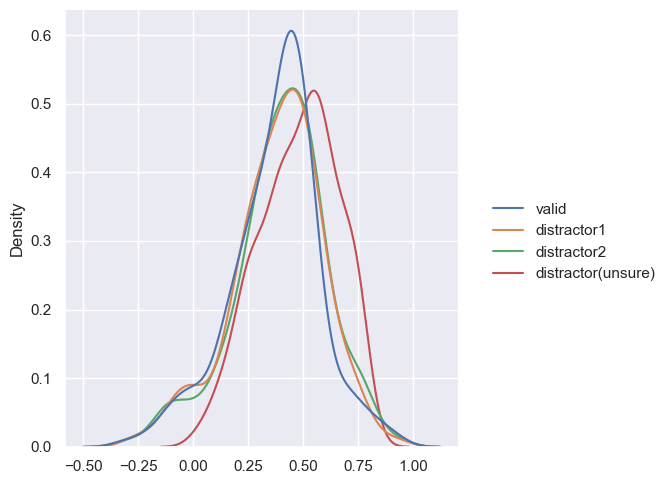

In [7]:
sns.displot(df, kind="kde")

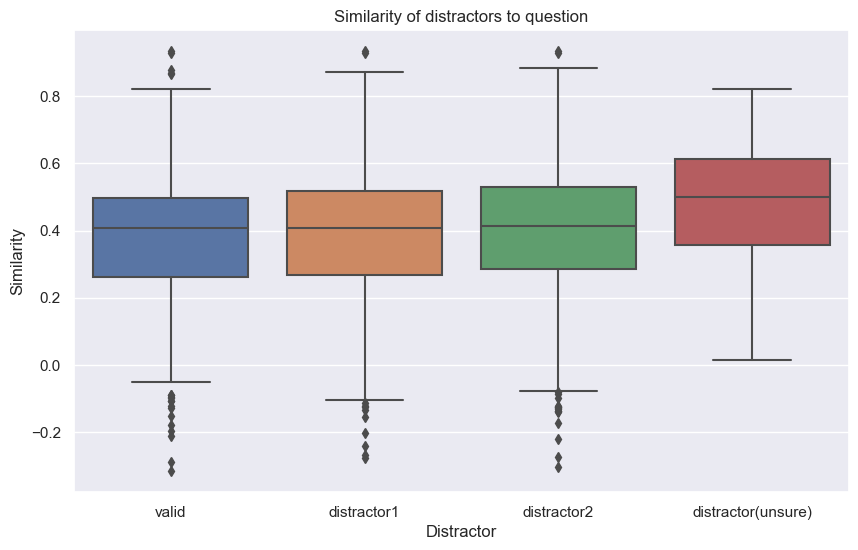

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Similarity of distractors to question")
plt.ylabel("Similarity")
plt.xlabel("Distractor")
plt.show()

In [9]:
# Make sure to download the NLTK punkt tokenizer for the first time
nltk.download("punkt")


def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))


def common_words(text1, text2):
    # Tokenize and convert to lower case
    words1 = word_tokenize(remove_punctuation(str(text1).lower()))
    words2 = word_tokenize(remove_punctuation(str(text2).lower()))
    # Find common words using set intersection
    common = set(words1).intersection(words2)
    return common, len(common)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Marek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
common_words_counts = {"answer": [], "distractor1": [], "distractor2": [], "distractor(unsure)": []}

for sample in data_wp:
    for key in common_words_counts.keys():
        common, num_common = common_words(sample["question"], sample[key])
        common_words_counts[key].append(num_common)

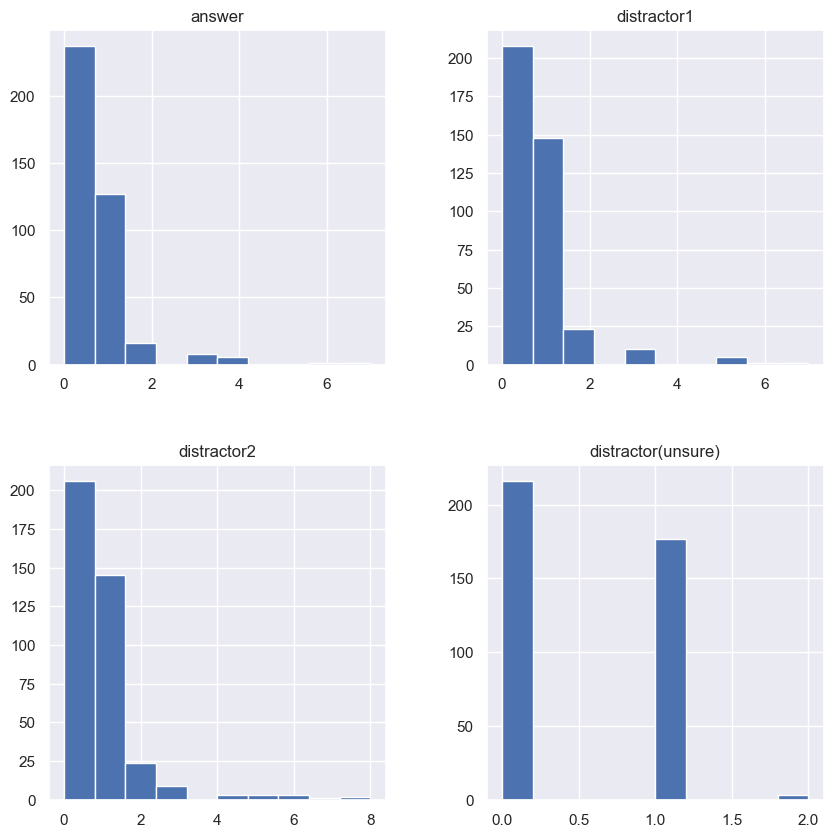

In [11]:
_ = pd.DataFrame(common_words_counts).hist(backend="matplotlib", figsize=(10, 10))

In [12]:
token_counts = {"question": [], "answer": [], "distractor1": [], "distractor2": [], "distractor(unsure)": []}

for sample in data_wp:
    for key in token_counts.keys():
        tokens = word_tokenize(remove_punctuation(str(sample[key]).lower()))
        token_counts[key].append(len(tokens))

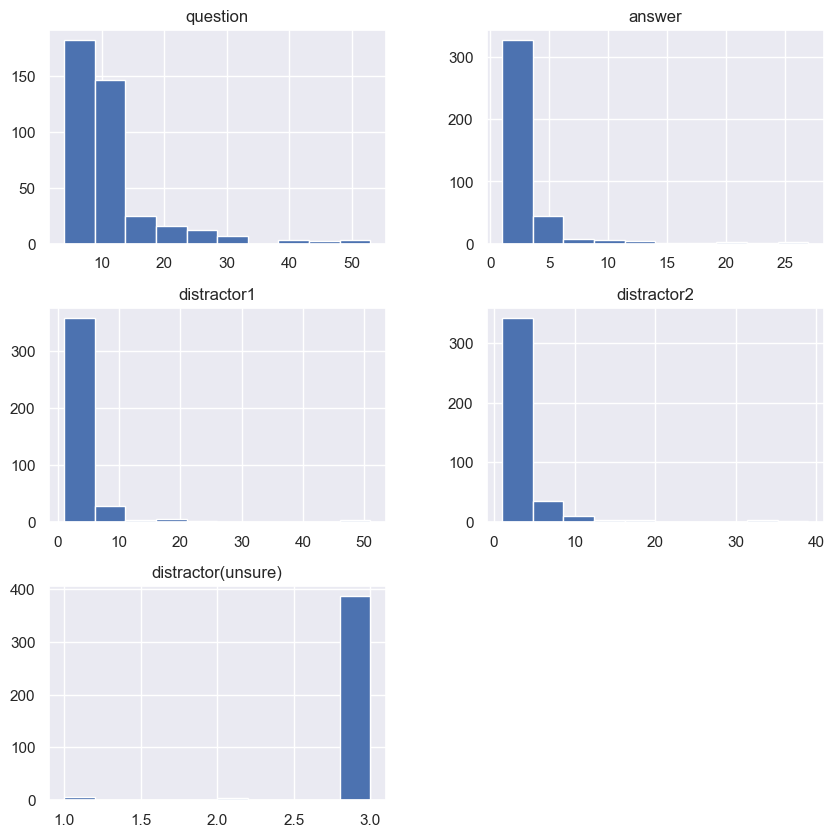

In [13]:
_ = pd.DataFrame(token_counts).hist(backend="matplotlib", figsize=(10, 10))

In [14]:
pd.DataFrame(token_counts).corr()

,question,answer,distractor1,distractor2,distractor(unsure)
question,1.000000,0.246829,0.193825,0.258405,-0.297485
answer,0.246829,1.000000,0.713822,0.689782,-0.096496
distractor1,0.193825,0.713822,1.000000,0.846295,0.060971
distractor2,0.258405,0.689782,0.846295,1.000000,-0.041000
distractor(unsure),-0.297485,-0.096496,0.060971,-0.041000,1.000000


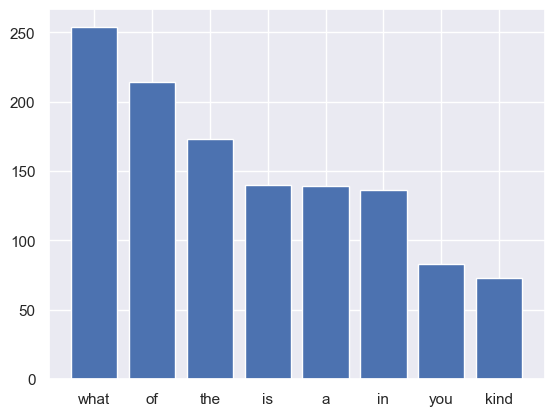

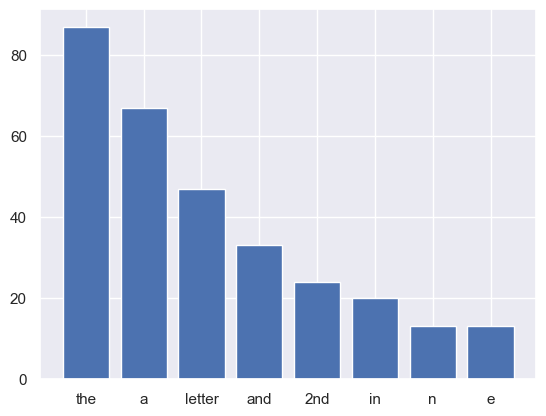

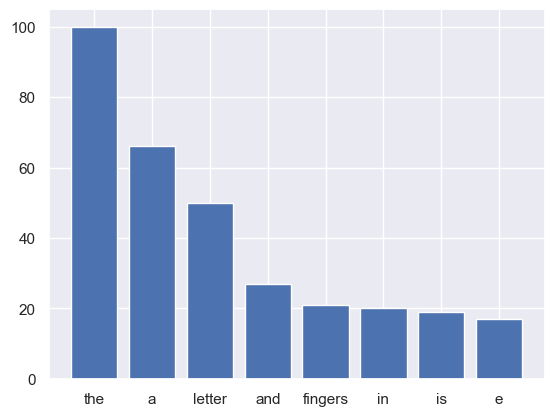

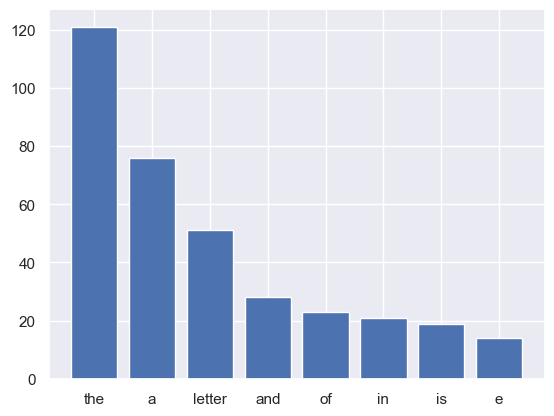

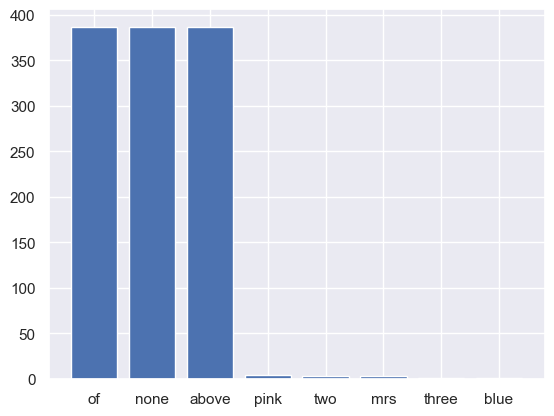

In [15]:
all_tokens = {"question": [], "answer": [], "distractor1": [], "distractor2": [], "distractor(unsure)": []}

for sample in data_wp:
    for key in token_counts.keys():
        tokens = word_tokenize(remove_punctuation(str(sample[key]).lower()))
        all_tokens[key] += tokens

for key in token_counts.keys():
    unique, counts = np.unique(all_tokens[key], return_counts=True)
    order = counts.argsort()[::-1]
    unique = unique[order][:8]
    counts = counts[order][:8]
    plt.bar(unique, counts)
    plt.show()

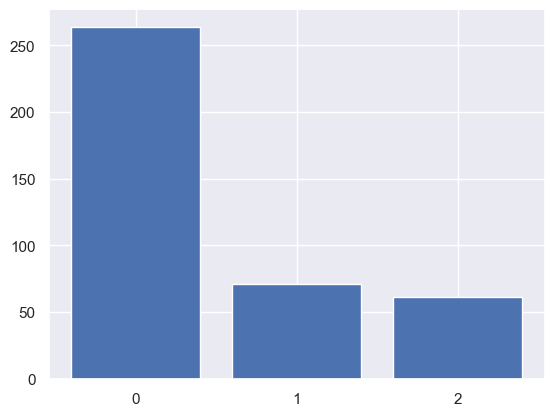

In [16]:
positions = [x["choice_order"].index(x["label"]) for x in data_wp]
unique, counts = np.unique(positions, return_counts=True)
plt.xticks(np.arange(min(unique), max(unique) + 1, 1.0))
plt.bar(unique, counts)
plt.show()

In [17]:
unsure = []
for sample in data_wp:
    unsure.append(sample["choice_list"][sample["label"]] == "None of above.")

np.count_nonzero(unsure)

9